# Human Resources Machine Learning Project

Predicting Employee Turnover

Objective:

To predict whether an employee will leave the company (attrition) based on various features such as age, job satisfaction, salary, etc.

In [107]:
# import the important libraries for loading and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
# loead the csv file 
df = pd.read_csv('HRDatasetP1.csv')

In [109]:
# assignimg the csv file in to hrds variable
hrds = df

In [110]:
# print the first 10 rows of the dataset
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11,LinkedIn,Exceeds,5.00,5,0,01-07-2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10,LinkedIn,Fully Meets,3.04,3,4,01-02-2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [111]:
# print the rows and columns of the dataset
df.shape

(311, 36)

In [112]:
# to know the colummns name datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [113]:
# to know more about the dataset
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,15.199357,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.864507,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,16.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.500000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [114]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [115]:
# for understanding the sum of the null values
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       0
RecruitmentSource               0
PerformanceSco

In [116]:
# assingning columns in to a list
columns = list(df)

In [117]:
# to find columns sum of 0 values
(df[columns[:]] == 0).sum()

Employee_Name                   0
EmpID                           0
MarriedID                     187
MaritalStatusID               137
GenderID                      176
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID        282
Salary                          0
Termd                         207
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination               0
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       0
RecruitmentSource               0
PerformanceSco

In [118]:
# replaceing null values with 0
df[columns[:]] = df[columns[:]].replace(0,np.nan)

In [119]:
# drop the null values columns and also unwanted columns for our analysis
col_to_drop = ['Employee_Name','EmpID','EmpStatusID','DeptID','PerfScoreID','MarriedID','PositionID','HispanicLatino','ManagerName','ManagerID','Absences','LastPerformanceReview_Date','MaritalStatusID','RaceDesc','State','Zip','MaritalDesc','CitizenDesc','GenderID','FromDiversityJobFairID','Termd','DateofTermination','SpecialProjectsCount','DaysLateLast30']
df.drop(columns=col_to_drop,inplace=True)

In [120]:
df.head(10)

,Salary,Position,DOB,Sex,DateofHire,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction
0,62506,Production Technician I,07-10-1983,M,07-05-2011,N/A-StillEmployed,Active,Production,LinkedIn,Exceeds,4.60,5
1,104437,Sr. DBA,05-05-1975,M,3/30/2015,career change,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3
2,64955,Production Technician II,09/19/88,F,07-05-2011,hours,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3
3,64991,Production Technician I,09/27/88,F,01-07-2008,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,4.84,5
4,50825,Production Technician I,09-08-1989,F,07-11-2011,return to school,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4
5,57568,Production Technician I,05/22/77,F,01-09-2012,N/A-StillEmployed,Active,Production,LinkedIn,Exceeds,5.00,5
6,95660,Software Engineer,05/24/79,F,11-10-2014,N/A-StillEmployed,Active,Software Engineering,LinkedIn,Fully Meets,3.04,3
7,59365,Production Technician I,02/18/83,M,9/30/2013,N/A-StillEmployed,Active,Production,Employee Referral,Fully Meets,5.00,4
8,47837,Production Technician I,02-11-1970,F,07-06-2009,N/A-StillEmployed,Active,Production,Diversity Job Fair,Fully Meets,4.46,3
9,50178,IT Support,01-07-1988,M,01-05-2015,N/A-StillEmployed,Active,IT/IS,Indeed,Fully Meets,5.00,5


In [121]:
df.columns

Index(['Salary', 'Position', 'DOB', 'Sex', 'DateofHire', 'TermReason',
       'EmploymentStatus', 'Department', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction'],
      dtype='object')

In [122]:
# checking null value
df.isnull().sum()

Salary               0
Position             0
DOB                  0
Sex                  0
DateofHire           0
TermReason           0
EmploymentStatus     0
Department           0
RecruitmentSource    0
PerformanceScore     0
EngagementSurvey     0
EmpSatisfaction      0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salary             311 non-null    int64  
 1   Position           311 non-null    object 
 2   DOB                311 non-null    object 
 3   Sex                311 non-null    object 
 4   DateofHire         311 non-null    object 
 5   TermReason         311 non-null    object 
 6   EmploymentStatus   311 non-null    object 
 7   Department         311 non-null    object 
 8   RecruitmentSource  311 non-null    object 
 9   PerformanceScore   311 non-null    object 
 10  EngagementSurvey   311 non-null    float64
 11  EmpSatisfaction    311 non-null    int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 29.3+ KB


In [124]:
df.shape

(311, 12)

# gender information into numerical values

In [125]:
df['Sex']

0      M 
1      M 
2       F
3       F
4       F
       ..
306    M 
307     F
308     F
309     F
310     F
Name: Sex, Length: 311, dtype: object

In [126]:
# removing white spaces 
df['Sex'] = df['Sex'].str.strip()

In [127]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [128]:
# Create a dictionary that maps 'M' to 0 and 'F' to 1
mapsx = {'M': 0, 'F': 1}
# Apply this mapping to the 'Sex' column of the DataFrame
df['Sex'] = df['Sex'].map(mapsx)

In [129]:
df['EmploymentStatus'].str.strip()

0                      Active
1      Voluntarily Terminated
2      Voluntarily Terminated
3                      Active
4      Voluntarily Terminated
                ...          
306                    Active
307    Voluntarily Terminated
308                    Active
309                    Active
310                    Active
Name: EmploymentStatus, Length: 311, dtype: object

In [130]:
df['EmploymentStatus'].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

# transform employment status categories into numerical values, indicating whether an employee is currently active or has left the company

In [131]:
mapemps = {'Active': 1, 'Voluntarily Terminated': 0, 'Terminated for Cause': 0}
df['EmploymentStatus'] = df['EmploymentStatus'].map(mapemps)

In [132]:
df['EmploymentStatus']

0      1
1      0
2      0
3      1
4      0
      ..
306    1
307    0
308    1
309    1
310    1
Name: EmploymentStatus, Length: 311, dtype: int64

In [133]:
# renaming the employment status in to attrition(target Variable)
df.rename(columns={'EmploymentStatus':'Attrition','TermReason':'Termination Reason','RecruitmentSource':'Recruitment Source','PerformanceScore':'Performance Score','EngagementSurvey':'Engagement Survey','EmpSatisfaction':'Employment Satisfaction'}, inplace=True)
df

,Salary,Position,DOB,Sex,DateofHire,Termination Reason,Attrition,Department,Recruitment Source,Performance Score,Engagement Survey,Employment Satisfaction
0,62506,Production Technician I,07-10-1983,0,07-05-2011,N/A-StillEmployed,1,Production,LinkedIn,Exceeds,4.60,5
1,104437,Sr. DBA,05-05-1975,0,3/30/2015,career change,0,IT/IS,Indeed,Fully Meets,4.96,3
2,64955,Production Technician II,09/19/88,1,07-05-2011,hours,0,Production,LinkedIn,Fully Meets,3.02,3
3,64991,Production Technician I,09/27/88,1,01-07-2008,N/A-StillEmployed,1,Production,Indeed,Fully Meets,4.84,5
4,50825,Production Technician I,09-08-1989,1,07-11-2011,return to school,0,Production,Google Search,Fully Meets,5.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
306,65893,Production Technician II,05-11-1985,0,07-07-2014,N/A-StillEmployed,1,Production,LinkedIn,Fully Meets,4.07,4
307,48513,Production Technician I,05-04-1982,1,09-02-2008,Another position,0,Production,Google Search,PIP,3.20,2
308,220450,CIO,08/30/79,1,04-10-2010,N/A-StillEmployed,1,IT/IS,Employee Referral,Exceeds,4.60,5
309,89292,Data Analyst,02/24/79,1,3/30/2015,N/A-StillEmployed,1,IT/IS,Employee Referral,Fully Meets,5.00,3


From data columns (DOB & Dateofhire)  is not in the same format

In [134]:
print("Original DOB values:")
print(df['DOB'].unique())

print("\nOriginal DateofHire values:")
print(df['DateofHire'].unique())

Original DOB values:
['07-10-1983' '05-05-1975' '09/19/88' '09/27/88' '09-08-1989' '05/22/77'
 '05/24/79' '02/18/83' '02-11-1970' '01-07-1988' '01-12-1974' '02/21/74'
 '07-04-1988' '07/20/83' '07/15/77' '10/18/81' '04/17/66' '10/27/70'
 '04-04-1986' '04-06-1979' '12/22/70' '12/27/58' '09-01-1989' '09/21/90'
 '01/16/67' '07/30/64' '04-04-1987' '03-10-1970' '08/24/90' '11/24/87'
 '07/28/83' '10/30/69' '06-01-1964' '03-02-1980' '08/19/77' '11/22/66'
 '08-09-1983' '04-05-1987' '02-02-1983' '06-06-1986' '05/15/63'
 '01-02-1951' '02-09-1972' '02-12-1979' '08/24/83' '06-11-1970' '08/27/83'
 '05/31/88' '09-05-1985' '08/31/81' '11/25/78' '08/26/80' '09-08-1977'
 '08-12-1979' '12/17/75' '03/19/83' '03/31/77' '08/26/86' '04-10-1987'
 '09-09-1965' '04/19/90' '01/18/52' '11-05-1978' '09/14/79' '04/15/88'
 '10/31/77' '07-05-1979' '11-02-1975' '02/25/51' '04/19/67' '09-04-1983'
 '11/15/82' '05/14/87' '12-02-1978' '10-07-1986' '07/18/88' '07-09-1970'
 '11-08-1988' '11/28/73' '09/23/73' '09-05-1991' '0

In [135]:
# import the parser library from dateutil
from dateutil import parser

In [136]:
def clean_and_parse_date(date):
    if pd.isnull(date):
        return pd.NaT
    try:
        return parser.parse(date, dayfirst=False)
    except (ValueError, TypeError):
        return pd.NaT  # Return NaT if parsing fails

In [137]:
# Apply the function to date columns
df['DOB'] = df['DOB'].apply(clean_and_parse_date)
df['DateofHire'] = df['DateofHire'].apply(clean_and_parse_date)

In [138]:
df[['DOB','DateofHire']].isnull().sum()

DOB           0
DateofHire    0
dtype: int64

In [139]:
print(df[['DOB', 'DateofHire']])

           DOB DateofHire
0   1983-07-10 2011-07-05
1   1975-05-05 2015-03-30
2   1988-09-19 2011-07-05
3   1988-09-27 2008-01-07
4   1989-09-08 2011-07-11
..         ...        ...
306 1985-05-11 2014-07-07
307 1982-05-04 2008-09-02
308 1979-08-30 2010-04-10
309 1979-02-24 2015-03-30
310 1978-08-17 2014-09-29

[311 rows x 2 columns]


# In our dataset, we don't have the 'Age' and 'Years at the Company' columns, so we need to calculate them from the related columns available in the dataset

In [140]:
df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365
df['Years at Company'] = (pd.to_datetime('today') - df['DateofHire']).dt.days // 365

df

,Salary,Position,DOB,Sex,DateofHire,Termination Reason,Attrition,Department,Recruitment Source,Performance Score,Engagement Survey,Employment Satisfaction,Age,Years at Company
0,62506,Production Technician I,1983-07-10,0,2011-07-05,N/A-StillEmployed,1,Production,LinkedIn,Exceeds,4.60,5,41,13
1,104437,Sr. DBA,1975-05-05,0,2015-03-30,career change,0,IT/IS,Indeed,Fully Meets,4.96,3,49,9
2,64955,Production Technician II,1988-09-19,1,2011-07-05,hours,0,Production,LinkedIn,Fully Meets,3.02,3,36,13
3,64991,Production Technician I,1988-09-27,1,2008-01-07,N/A-StillEmployed,1,Production,Indeed,Fully Meets,4.84,5,36,16
4,50825,Production Technician I,1989-09-08,1,2011-07-11,return to school,0,Production,Google Search,Fully Meets,5.00,4,35,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,65893,Production Technician II,1985-05-11,0,2014-07-07,N/A-StillEmployed,1,Production,LinkedIn,Fully Meets,4.07,4,39,10
307,48513,Production Technician I,1982-05-04,1,2008-09-02,Another position,0,Production,Google Search,PIP,3.20,2,42,16
308,220450,CIO,1979-08-30,1,2010-04-10,N/A-StillEmployed,1,IT/IS,Employee Referral,Exceeds,4.60,5,45,14
309,89292,Data Analyst,1979-02-24,1,2015-03-30,N/A-StillEmployed,1,IT/IS,Employee Referral,Fully Meets,5.00,3,45,9


C:\Users\albin\AppData\Local\Temp\ipykernel_2820\3755274940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

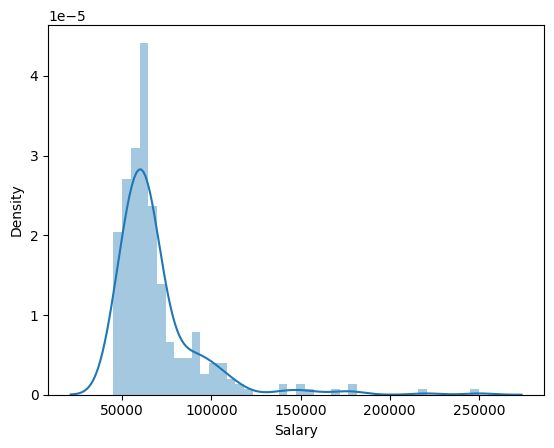

In [141]:
# distibution of 'Salary'
sns.distplot(df['Salary'])

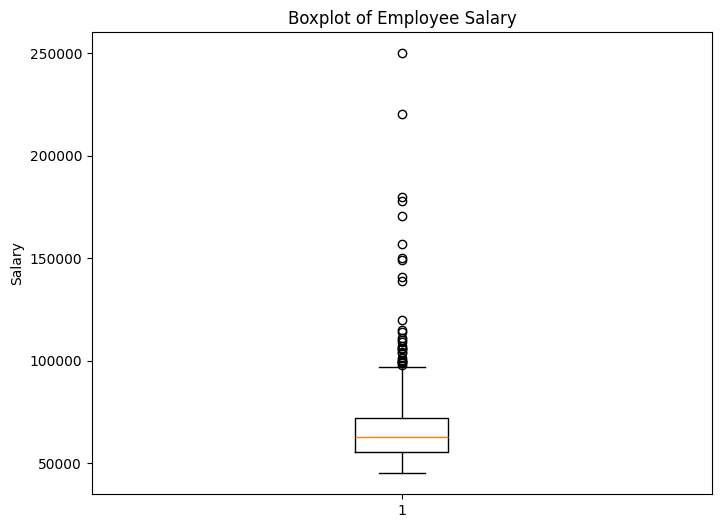

In [142]:
# for knowing the oulliers
plt.figure(figsize=(8,6))
plt.boxplot(df['Salary'])
plt.title('Boxplot of Employee Salary')
plt.ylabel('Salary')
plt.show()

only 2 outliers between 200000 and 260000, so clean that outliers for good model

In [143]:
# we want the values between 25 and 75 
q1 = np.percentile(df['Salary'],25)
print(q1)

55501.5


In [144]:
q3 = np.percentile(df['Salary'],75)
print(q3)

72036.0


In [145]:
#inter quartile range 
iqr = q3- q1
print(iqr)

16534.5


In [146]:
# for lower bound and upper bound we use this formula 1.5 is constant
low = q1 - 1.5 * iqr
upp = q3 + 1.5 * iqr

In [147]:
# print the lower and upper
print(f'lower bound :',{low})
print(f'Upper bound :',{upp})

lower bound : {30699.75}
Upper bound : {96837.75}


In [148]:
outliers = []

for i in df['Salary']:
    if((i > upp) or (i < low)):
        outliers.append(i)

outliers

[104437,
 110000,
 103613,
 106367,
 100031,
 110929,
 170500,
 101199,
 138888,
 99280,
 178000,
 99351,
 114800,
 99020,
 97999,
 180000,
 105700,
 250000,
 105688,
 157000,
 108987,
 120000,
 150290,
 140920,
 148999,
 100416,
 113999,
 107226,
 220450]

In [149]:
for i in df["Salary"]:
    if i not in outliers:
        print(i)

62506
64955
64991
50825
57568
95660
59365
47837
50178
54670
47211
92328
58709
52505
57834
70131
59026
53250
51044
64919
62910
66441
57815
74312
53492
63000
65288
64375
74326
63763
62162
77692
72640
93396
52846
71860
61656
54237
60380
66808
64786
64816
68678
64066
59369
50373
63108
59144
68051
63381
83552
56149
92329
65729
85028
57583
56294
56991
55722
61568
58275
53189
96820
51259
59231
61584
46335
70621
74241
75188
62514
60070
48888
54285
56847
60340
59124
71776
65902
57748
64057
53366
58530
72609
55965
70187
67251
65707
52249
53171
51337
51505
59370
54933
57815
61555
74679
53018
59892
68898
61242
66825
48285
66149
49256
62957
63813
71707
54828
64246
52177
62065
46998
68099
70545
63478
49920
55425
69340
64995
68182
83082
51908
61242
45069
60724
60436
46837
63322
61154
68999
50482
65310
54005
45433
46654
63973
71339
93206
82758
66074
46120
64520
61962
81584
63676
93046
64738
70468
77915
52624
63450
51777
67237
73330
52057
47434
52788
45395
62385
68407
61349
54132
55315
62810
63291
6265

In [150]:
# removing the outliers 
df = df[(df['Salary'] >= low) & (df['Salary'] <= upp)]

In [151]:
#display the salary
df['Salary']

0      62506
2      64955
3      64991
4      50825
5      57568
       ...  
305    60446
306    65893
307    48513
309    89292
310    45046
Name: Salary, Length: 282, dtype: int64

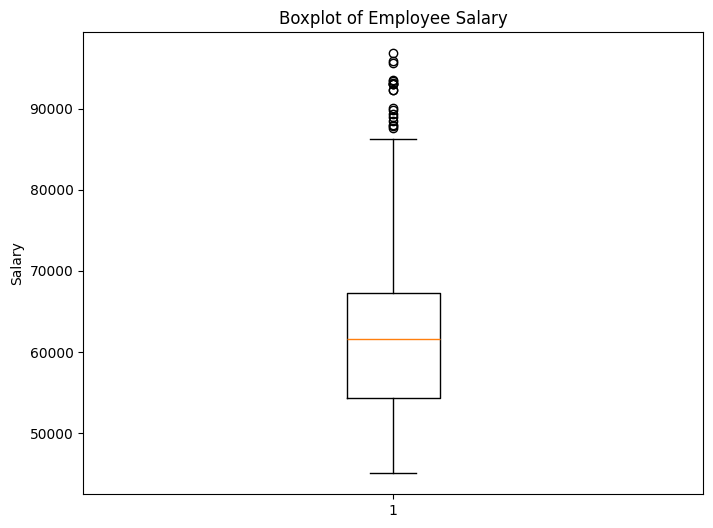

In [152]:
plt.figure(figsize=(8,6))
plt.boxplot(df['Salary'])
plt.title('Boxplot of Employee Salary')
plt.ylabel('Salary')
plt.show()

In [153]:
df.head(10)

,Salary,Position,DOB,Sex,DateofHire,Termination Reason,Attrition,Department,Recruitment Source,Performance Score,Engagement Survey,Employment Satisfaction,Age,Years at Company
0,62506,Production Technician I,1983-07-10,0,2011-07-05,N/A-StillEmployed,1,Production,LinkedIn,Exceeds,4.60,5,41,13
2,64955,Production Technician II,1988-09-19,1,2011-07-05,hours,0,Production,LinkedIn,Fully Meets,3.02,3,36,13
3,64991,Production Technician I,1988-09-27,1,2008-01-07,N/A-StillEmployed,1,Production,Indeed,Fully Meets,4.84,5,36,16
4,50825,Production Technician I,1989-09-08,1,2011-07-11,return to school,0,Production,Google Search,Fully Meets,5.00,4,35,13
5,57568,Production Technician I,1977-05-22,1,2012-01-09,N/A-StillEmployed,1,Production,LinkedIn,Exceeds,5.00,5,47,12
6,95660,Software Engineer,1979-05-24,1,2014-11-10,N/A-StillEmployed,1,Software Engineering,LinkedIn,Fully Meets,3.04,3,45,9
7,59365,Production Technician I,1983-02-18,0,2013-09-30,N/A-StillEmployed,1,Production,Employee Referral,Fully Meets,5.00,4,41,11
8,47837,Production Technician I,1970-02-11,1,2009-07-06,N/A-StillEmployed,1,Production,Diversity Job Fair,Fully Meets,4.46,3,54,15
9,50178,IT Support,1988-01-07,0,2015-01-05,N/A-StillEmployed,1,IT/IS,Indeed,Fully Meets,5.00,5,36,9
10,54670,Production Technician I,1974-01-12,1,2011-01-10,Another position,0,Production,Diversity Job Fair,Fully Meets,4.20,4,50,13


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Salary                   282 non-null    int64         
 1   Position                 282 non-null    object        
 2   DOB                      282 non-null    datetime64[ns]
 3   Sex                      282 non-null    int64         
 4   DateofHire               282 non-null    datetime64[ns]
 5   Termination Reason       282 non-null    object        
 6   Attrition                282 non-null    int64         
 7   Department               282 non-null    object        
 8   Recruitment Source       282 non-null    object        
 9   Performance Score        282 non-null    object        
 10  Engagement Survey        282 non-null    float64       
 11  Employment Satisfaction  282 non-null    int64         
 12  Age                      282 non-null    

In [155]:
df['Position'].value_counts()

Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
IT Support                        8
Data Analyst                      7
Software Engineer                 5
Network Engineer                  5
Sr. Network Engineer              4
Accountant I                      3
Sales Manager                     3
BI Developer                      3
Administrative Assistant          3
Senior BI Developer               3
Shared Services Manager           1
Software Engineering Manager      1
Data Analyst                      1
Name: count, dtype: int64

In [156]:
df['Department'].value_counts()

Department
Production              208
IT/IS                    31
Sales                    30
Admin Offices             7
Software Engineering      6
Name: count, dtype: int64

# Department wise Salary Distribution

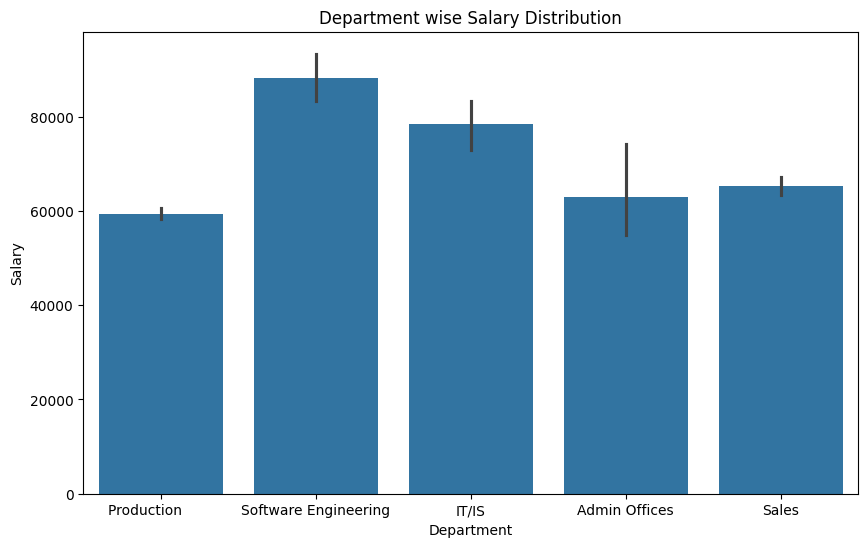

In [157]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Department', y = 'Salary', data = df)
plt.title('Department wise Salary Distribution')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

# Position wise Salary Distribution

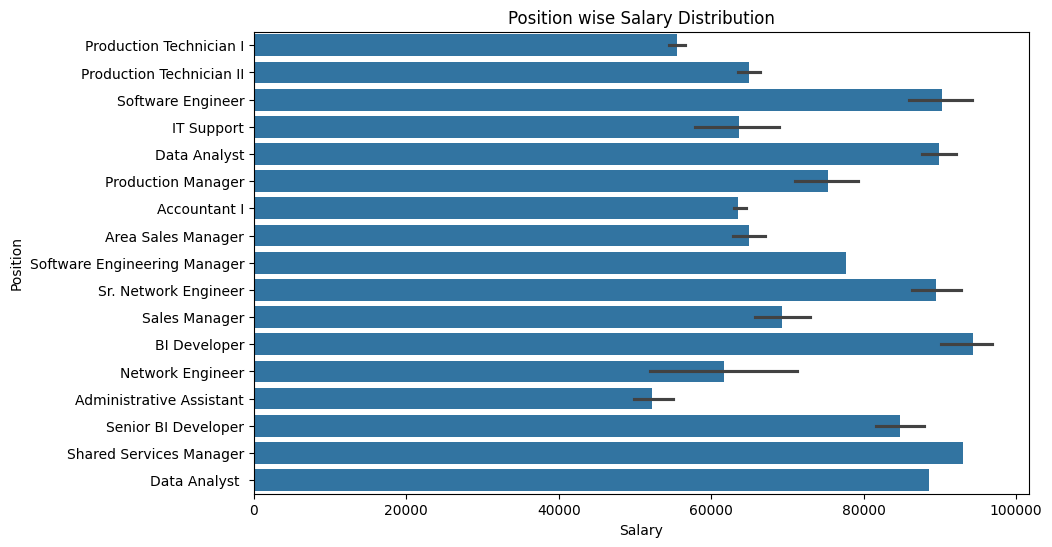

In [158]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Salary', y = 'Position', data = df)
plt.title('Position wise Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Position')
plt.show()

# job satisfaction

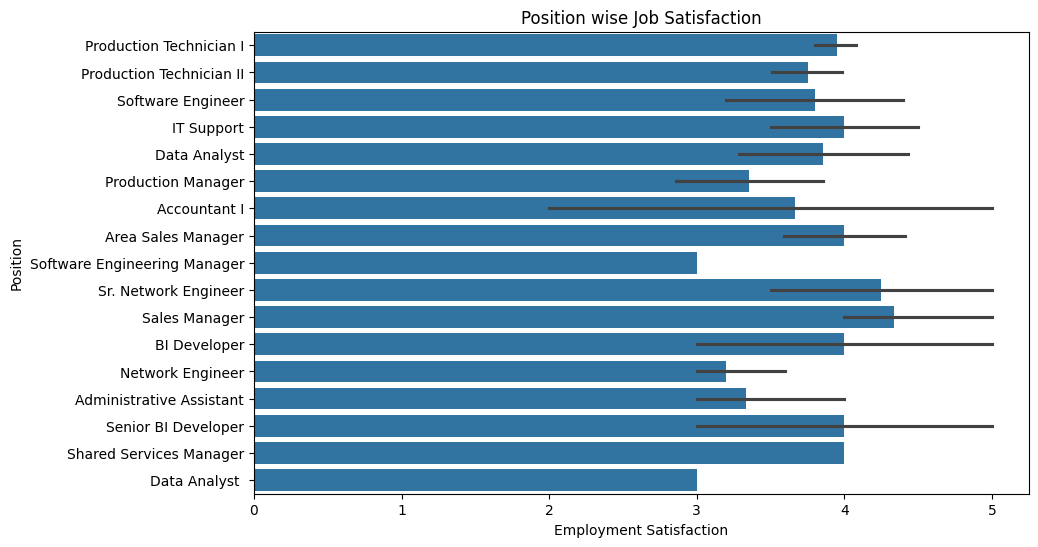

In [159]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Employment Satisfaction', y = 'Position', data = df)
plt.title('Position wise Job Satisfaction')
plt.xlabel('Employment Satisfaction')
plt.ylabel('Position')
plt.show()

# Employee count by year at company 

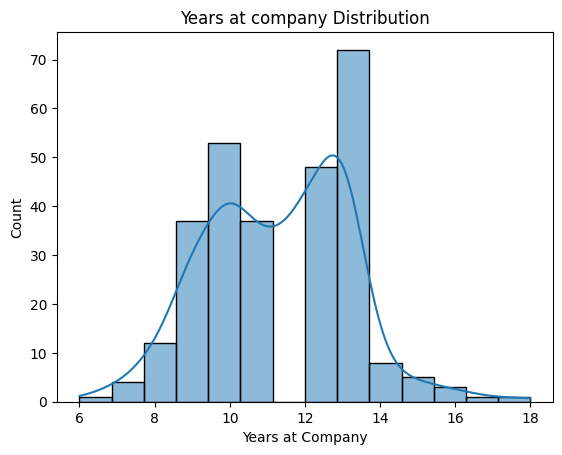

In [160]:
sns.histplot(df['Years at Company'], kde=True)
plt.title('Years at company Distribution')
plt.show()

# Employee count by salary

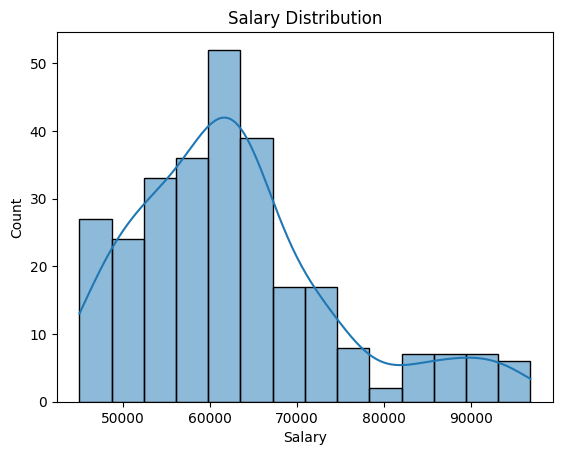

In [161]:
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

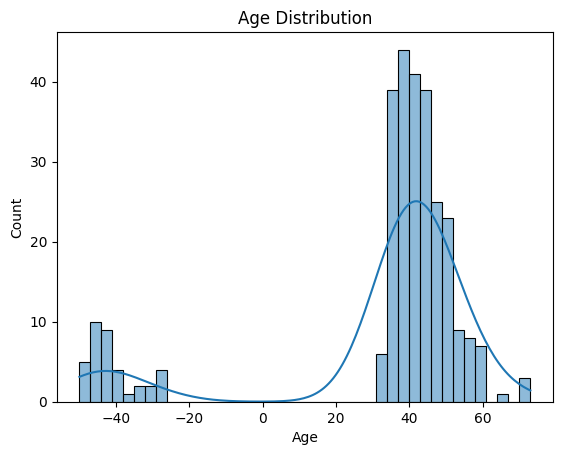

In [162]:
#age ditribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

## removing negative values in above graph

In [163]:
# Find rows where Age is negative
negative_ages = df[df['Age'] < 0]
print(negative_ages)

     Salary                      Position        DOB  Sex DateofHire  \
16    70131      Production Technician II 2066-04-17    1 2016-07-21   
17    59026       Production Technician I 2070-10-27    1 2011-04-04   
20    51044       Production Technician I 2070-12-22    0 2012-04-02   
21    64919       Production Technician I 2058-12-27    1 2013-08-19   
24    57815      Production Technician II 2067-01-16    1 2011-01-10   
31    64375       Production Technician I 2069-10-30    1 2013-11-11   
35    77692  Software Engineering Manager 2066-11-22    0 2011-08-15   
40    71860            Area Sales Manager 2063-05-15    1 2014-08-18   
61    85028          Sr. Network Engineer 2052-01-18    1 2014-11-10   
68    58275      Production Technician II 2051-02-25    1 2011-04-04   
69    53189       Production Technician I 2067-04-19    0 2014-07-07   
78    75188            Production Manager 2073-11-28    1 2014-09-18   
79    62514       Production Technician I 2073-09-23    1 2010-0

In [164]:
# Remove the -ve age rows
df = df[df['DOB'] <= pd.to_datetime('today')]

In [165]:
# Recalculate age after removing -ve age rows
df.loc[:, 'Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365
df['Age']

0      41
2      36
3      36
4      35
5      47
       ..
305    39
306    39
307    42
309    45
310    46
Name: Age, Length: 245, dtype: int64

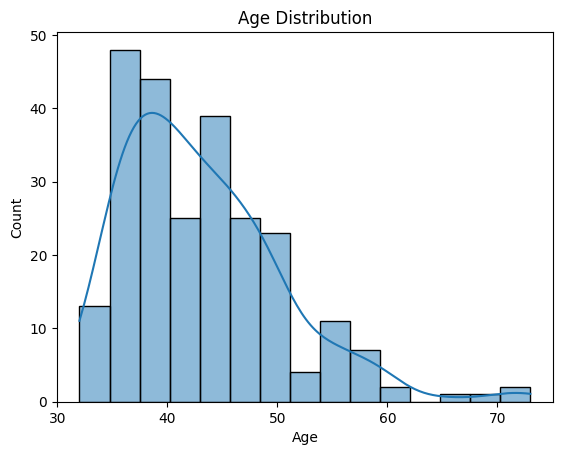

In [166]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [167]:
# Attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(f"Attrition Rate:\n{attrition_rate}")

Attrition Rate:
Attrition
1    66.938776
0    33.061224
Name: proportion, dtype: float64


In [168]:
# Total number of employees by department
total_emp_dep = df.groupby('Department')['Attrition'].count()
total_emp_dep

Department
Admin Offices             7
IT/IS                    28
Production              179
Sales                    26
Software Engineering      5
Name: Attrition, dtype: int64

In [169]:
# Number of employees who left by department
emp_left_frm_dpt = df[df['Attrition'] == 0].groupby('Department')['Attrition'].count()
emp_left_frm_dpt

Department
Admin Offices            2
IT/IS                    3
Production              70
Sales                    5
Software Engineering     1
Name: Attrition, dtype: int64

In [170]:
# Attrition rate (percentage) by department
perc_emp_left_frm_dpt = (emp_left_frm_dpt / total_emp_dep) * 100
perc_emp_left_frm_dpt

Department
Admin Offices           28.571429
IT/IS                   10.714286
Production              39.106145
Sales                   19.230769
Software Engineering    20.000000
Name: Attrition, dtype: float64

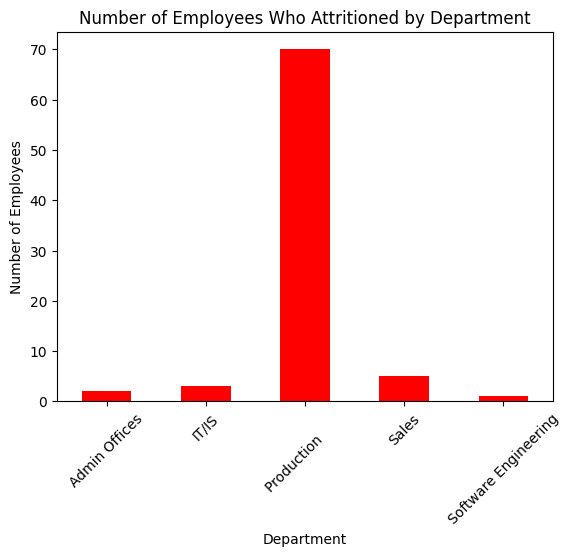

In [171]:
# Plot the number of employees who left by department
emp_left_frm_dpt.plot(kind='bar', color='red')
plt.title('Number of Employees Who Attritioned by Department')
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

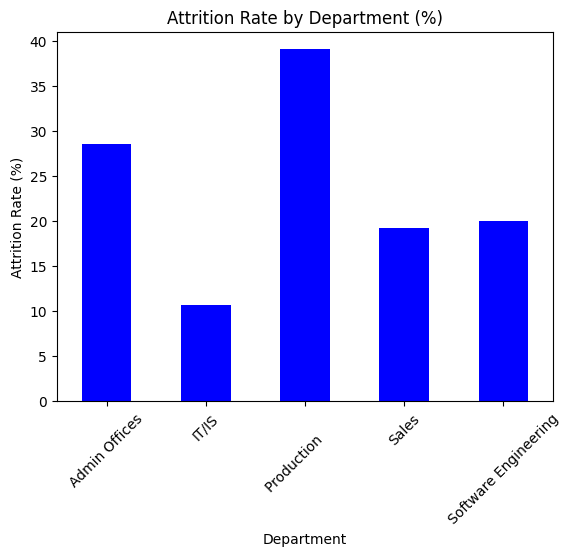

In [172]:
# Plot the attrition rate by department
perc_emp_left_frm_dpt.plot(kind='bar', color='blue')
plt.title('Attrition Rate by Department (%)')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

In [173]:
# Job Satisfaction rate
job_satis_rate = df['Employment Satisfaction'].value_counts(normalize=True) * 100
print(f"Job Satisfaction Rate:\n{job_satis_rate}")

Job Satisfaction Rate:
Employment Satisfaction
3    34.285714
4    32.244898
5    29.795918
2     2.857143
1     0.816327
Name: proportion, dtype: float64


In [174]:
total_emp_sati = df.groupby('Employment Satisfaction')['Attrition'].count()
total_emp_sati

Employment Satisfaction
1     2
2     7
3    84
4    79
5    73
Name: Attrition, dtype: int64

In [175]:
# Number of employees who left by job satisfaction
emp_left_frm_satis = df[df['Attrition'] == 0].groupby('Employment Satisfaction')['Attrition'].count()
emp_left_frm_satis

Employment Satisfaction
2     4
3    25
4    29
5    23
Name: Attrition, dtype: int64

In [176]:
# Attrition rate (percentage) by Job Satisfaction
perc_emp_left_frm_satis = (emp_left_frm_satis / total_emp_sati) * 100
perc_emp_left_frm_satis

Employment Satisfaction
1          NaN
2    57.142857
3    29.761905
4    36.708861
5    31.506849
Name: Attrition, dtype: float64

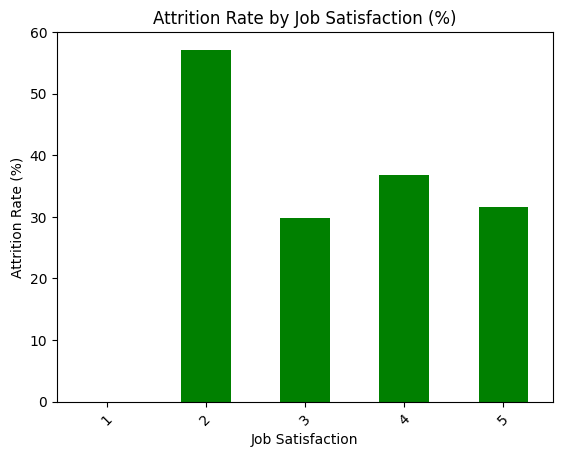

In [177]:
# Plot the attrition rate by Job Satisfaction
perc_emp_left_frm_satis.plot(kind='bar', color='Green')
plt.title('Attrition Rate by Job Satisfaction (%)')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

In [178]:
df['Performance Score'].value_counts()

Performance Score
Fully Meets          194
Exceeds               24
Needs Improvement     16
PIP                   11
Name: count, dtype: int64

In [179]:
# Number of employees who left by Perfomance Score
emp_left_frm_persc = df[df['Attrition'] == 0].groupby('Performance Score')['Attrition'].count()
emp_left_frm_persc

Performance Score
Exceeds               4
Fully Meets          63
Needs Improvement     9
PIP                   5
Name: Attrition, dtype: int64

In [180]:
total_emp_gen = df.groupby('Sex')['Attrition'].count()
total_emp_gen

Sex
0    110
1    135
Name: Attrition, dtype: int64

In [181]:
# Number of employees who left by Gender
emp_left_frm_gen = df[df['Attrition'] == 0].groupby('Sex')['Attrition'].count()
print(f'Male-> 0 \nFemale-> 1\n{emp_left_frm_gen}')

Male-> 0 
Female-> 1
Sex
0    37
1    44
Name: Attrition, dtype: int64


In [182]:
# Attrition rate (percentage) by gen
perc_emp_left_frm_gen = (emp_left_frm_gen / total_emp_gen) * 100
perc_emp_left_frm_gen

Sex
0    33.636364
1    32.592593
Name: Attrition, dtype: float64

In [183]:
df['Termination Reason'].value_counts()

Termination Reason
N/A-StillEmployed                   164
Another position                     14
unhappy                              12
more money                            9
career change                         7
attendance                            6
relocation out of area                5
hours                                 5
return to school                      5
retiring                              3
performance                           3
military                              3
maternity leave - did not return      3
no-call, no-show                      2
medical issues                        2
Fatal attraction                      1
gross misconduct                      1
Name: count, dtype: int64

In [184]:
df.describe()

,Salary,DOB,Sex,DateofHire,Attrition,Engagement Survey,Employment Satisfaction,Age,Years at Company
count,245.000000,245,245.000000,245,245.000000,245.000000,245.000000,245.000000,245.000000
mean,62751.342857,1981-03-20 13:42:51.428571456,0.551020,2013-01-31 10:28:53.877551104,0.669388,4.076694,3.873469,43.151020,11.236735
min,45046.000000,1951-01-02 00:00:00,0.000000,2007-06-25 00:00:00,0.000000,1.200000,1.000000,32.000000,6.000000
25%,54237.000000,1977-03-23 00:00:00,0.000000,2011-07-05 00:00:00,0.000000,3.600000,3.000000,38.000000,10.000000
50%,61568.000000,1982-10-07 00:00:00,1.000000,2013-02-18 00:00:00,1.000000,4.200000,4.000000,42.000000,11.000000
75%,66738.000000,1986-10-07 00:00:00,1.000000,2014-08-18 00:00:00,1.000000,4.650000,5.000000,47.000000,13.000000
max,96820.000000,1992-08-17 00:00:00,1.000000,2018-07-09 00:00:00,1.000000,5.000000,5.000000,73.000000,17.000000
std,11810.721217,NaN,0.498408,NaN,0.471397,0.788538,0.903267,7.288946,1.903695


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Salary                   245 non-null    int64         
 1   Position                 245 non-null    object        
 2   DOB                      245 non-null    datetime64[ns]
 3   Sex                      245 non-null    int64         
 4   DateofHire               245 non-null    datetime64[ns]
 5   Termination Reason       245 non-null    object        
 6   Attrition                245 non-null    int64         
 7   Department               245 non-null    object        
 8   Recruitment Source       245 non-null    object        
 9   Performance Score        245 non-null    object        
 10  Engagement Survey        245 non-null    float64       
 11  Employment Satisfaction  245 non-null    int64         
 12  Age                      245 non-null    

In [186]:
# Converts normal categorical variable into numeric values.for this one-hot encoding is used
df = pd.get_dummies(df, columns=['Department', 'Performance Score', 'Position', 'Recruitment Source','Termination Reason'], drop_first=True)

We Have to select attrition as our target variable and others are selected as features 

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
# Define features and target variable
X = df.drop('Attrition', axis=1)  # Drop the target column
y = df['Attrition']  # Target variable

In [189]:
# Split the data, 30% for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
# Convert categorical columns to dummy variables (One-Hot Encoding)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [106]:
# we have to drop the date of hire columns and DOB columns
drop_d_a_dat = ['DOB','DateofHire']
df.drop(columns=drop_d_a_dat,inplace=True)

KeyError: "['DOB', 'DateofHire'] not found in axis"

In [191]:
print(X_train.dtypes)  # Check data types of X_train columns

Salary                                                          int64
DOB                                                    datetime64[ns]
Sex                                                             int64
DateofHire                                             datetime64[ns]
Engagement Survey                                             float64
Employment Satisfaction                                         int64
Age                                                             int64
Years at Company                                                int64
Department_IT/IS                                                 bool
Department_Production                                            bool
Department_Sales                                                 bool
Department_Software Engineering                                  bool
Performance Score_Fully Meets                                    bool
Performance Score_Needs Improvement                              bool
Performance Score_PI

In [192]:
# Check which columns are of datetime type
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
print("DateTime columns in X_train:\n", datetime_columns)

DateTime columns in X_train:
 Index(['DOB', 'DateofHire'], dtype='object')


In [193]:
# Drop DateTime columns from X_train and X_test
X_train = X_train.drop(datetime_columns, axis=1)
X_test = X_test.drop(datetime_columns, axis=1)

In [194]:
X_train.dtypes

Salary                                                   int64
Sex                                                      int64
Engagement Survey                                      float64
Employment Satisfaction                                  int64
Age                                                      int64
Years at Company                                         int64
Department_IT/IS                                          bool
Department_Production                                     bool
Department_Sales                                          bool
Department_Software Engineering                           bool
Performance Score_Fully Meets                             bool
Performance Score_Needs Improvement                       bool
Performance Score_PIP                                     bool
Position_Administrative Assistant                         bool
Position_Area Sales Manager                               bool
Position_BI Developer                                  

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest for model building

In [197]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
# Initialize and train Random Forest model
hrmodel = RandomForestClassifier(n_estimators=100, random_state=42)
hrmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [199]:
# prediction 
y_pred = hrmodel.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1]


# 1 for those who still active in the company
# 0 for those who left from the company

In [200]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [201]:
# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[23  0]
 [ 0 51]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        51

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



from confution matrix Row [23 0]: Out of 23 employees who actually left (Attrition = 0), the model predicted all 23 correctly. There were no false negatives (no employees who left were incorrectly predicted as staying).
Row [0 51]: Out of 51 employees who actually stayed (Attrition = 1), the model predicted all 51 correctly. There were no false positives (no employees who stayed were incorrectly predicted as leaving).

In [202]:
# Get feature importances
importances = hrmodel.feature_importances_
feature_names = X_train.columns  # Ensure X_train is the dataset used for training

# Create a DataFrame with feature names and their importance
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Remove features with zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] > 0]

# Sort the DataFrame based on importance
non_zero_importances = non_zero_importances.sort_values(by='Importance', ascending=False)

# Display the sorted non-zero feature importances
print(non_zero_importances)

                                              Feature  Importance
37               Termination Reason_N/A-StillEmployed    0.506840
5                                    Years at Company    0.097098
51                         Termination Reason_unhappy    0.033760
2                                   Engagement Survey    0.031118
0                                              Salary    0.029423
45                      Termination Reason_more money    0.022279
38                      Termination Reason_attendance    0.021974
4                                                 Age    0.021019
41                           Termination Reason_hours    0.020949
50                Termination Reason_return to school    0.018473
39                   Termination Reason_career change    0.018282
30                   Recruitment Source_Google Search    0.016876
48          Termination Reason_relocation out of area    0.016801
3                             Employment Satisfaction    0.012276
47        

Here we can see that feature importance is more for still employed ,then years at the comapny,and then unhappy

In [203]:
# Keep only features with importance greater than 0.01
threshold = 0.01
selected_features = non_zero_importances[non_zero_importances['Importance'] > threshold]
print(selected_features)

                                              Feature  Importance
37               Termination Reason_N/A-StillEmployed    0.506840
5                                    Years at Company    0.097098
51                         Termination Reason_unhappy    0.033760
2                                   Engagement Survey    0.031118
0                                              Salary    0.029423
45                      Termination Reason_more money    0.022279
38                      Termination Reason_attendance    0.021974
4                                                 Age    0.021019
41                           Termination Reason_hours    0.020949
50                Termination Reason_return to school    0.018473
39                   Termination Reason_career change    0.018282
30                   Recruitment Source_Google Search    0.016876
48          Termination Reason_relocation out of area    0.016801
3                             Employment Satisfaction    0.012276
47        

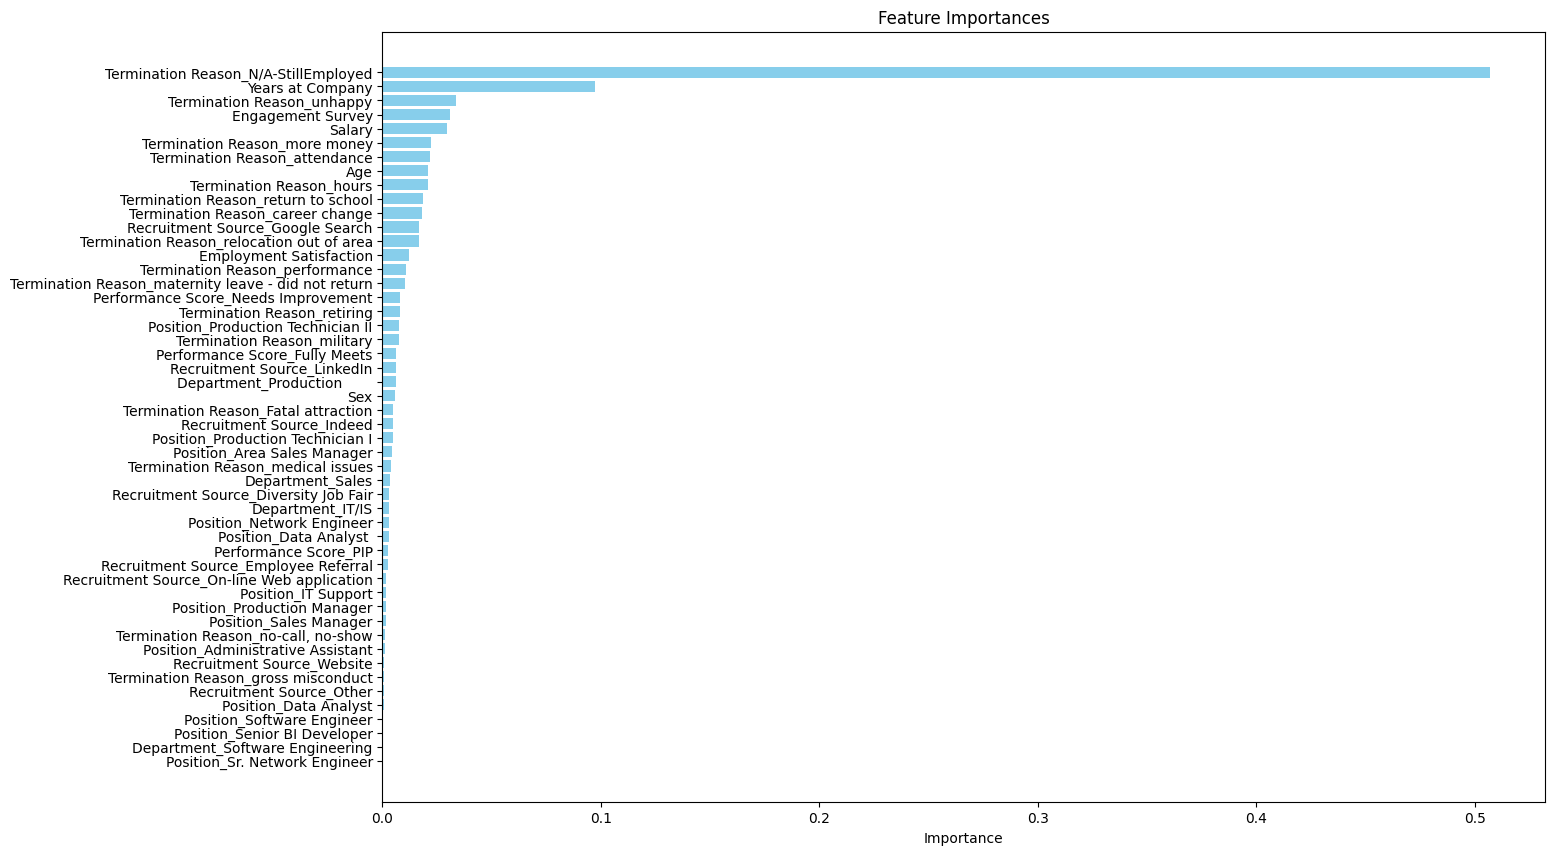

In [204]:
plt.figure(figsize=(15, 10))
plt.barh(non_zero_importances['Feature'], non_zero_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

In [205]:
import joblib

In [206]:
# Save the model
joblib.dump(hrmodel, 'employee_attrition_model.pkl')

['employee_attrition_model.pkl']

In [207]:
 # Load the model
 loaded_model = joblib.load('employee_attrition_model.pkl')
 # Make predictions with the loaded model
 new_predictions = loaded_model.predict(X_test)

In [208]:
loaded_model

RandomForestClassifier(random_state=42)

In [209]:
new_predictions

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

Summary process.

 In this project, we built a machine learning model to predict employee attrition using a Random
 Forest classifier. We started by loading and exploring the dataset, followed by data
 preprocessing, model building, training, and evaluation. Finally, we analyzed feature importances
 and discussed the steps for model deployment.

This project can be further enhanced by:

● Tuning hyperparameters using GridSearchCV.

● Trying different machine learning algorithms.

● Incorporating additional features.

● Building a more sophisticated model evaluation process.